# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
# import geopandas as gpd
import numpy as np

# from fuzzywuzzy import process
# from fuzzywuzzy import fuzz

import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

# Load data

In [ ]:
df = pd.read_csv('data/2022-03-08-clean.csv')
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,China,111520.0,325.0,4636.0,NaN,102832.0,110.0,4052.0,9.0,77.0,3.0,160000000.0,111163.0,1.439324e+09,Asia
1,USA,81024903.0,33615.0,988208.0,1299.0,55221462.0,202659.0,24815233.0,5421.0,242395.0,2956.0,960233929.0,2872645.0,3.342683e+08,North America
2,India,42975883.0,4575.0,515386.0,145.0,42413566.0,7416.0,46931.0,8944.0,30635.0,367.0,774310567.0,551964.0,1.402828e+09,Asia
3,Brazil,29144964.0,75495.0,652936.0,518.0,27344949.0,165757.0,1147079.0,8318.0,135494.0,3035.0,63776166.0,296493.0,2.151015e+08,South America
4,France,23164872.0,93050.0,139618.0,167.0,21836839.0,98559.0,1188415.0,2484.0,353573.0,2131.0,246629975.0,3764393.0,6.551653e+07,Europe


In [ ]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent'],
      dtype='object')

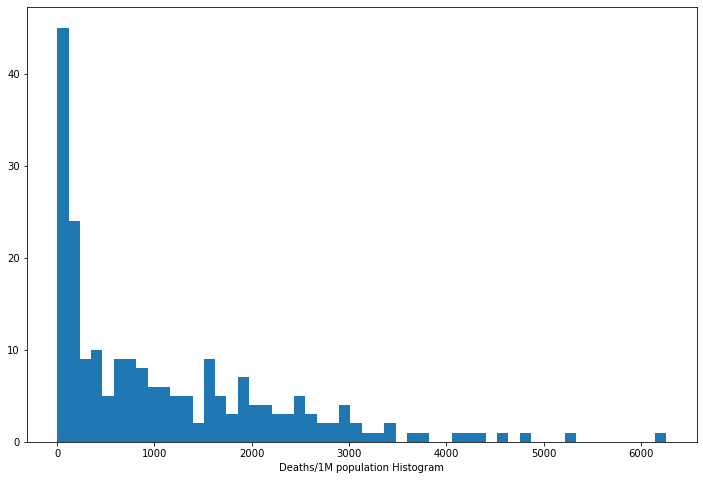

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['Deaths/1M pop'],bins = len(df)//4)
plt.xlabel('Deaths/1M population Histogram')
plt.savefig('hist.png')
plt.show()

# Z-score

In [ ]:
def z_score(x):
    return (x-x.mean())/x.std()

# Top 10 total cases (Done)

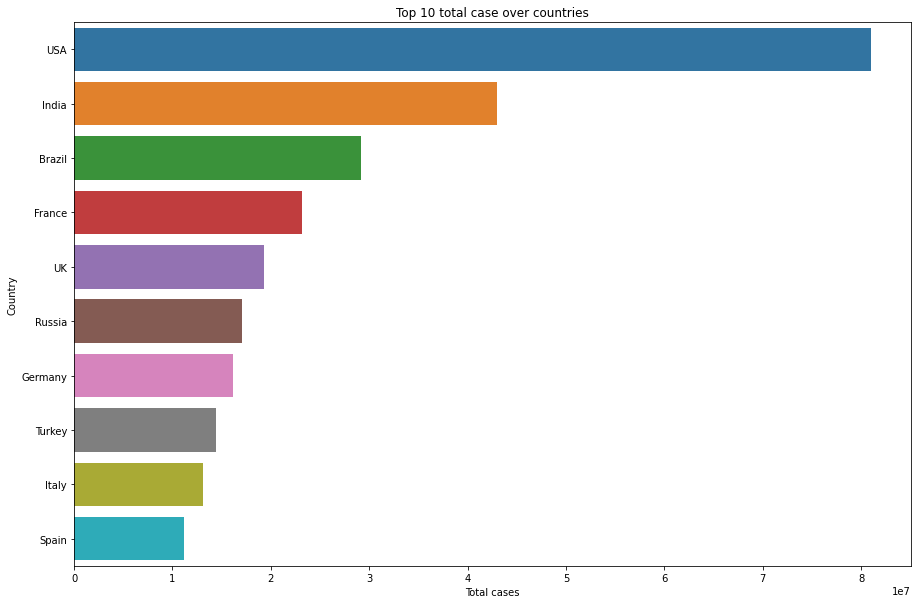

In [ ]:
top10_total_index = df['TotalCases'].values.argsort()[::-1]
top10_total = df.iloc[top10_total_index[:10]]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_total,x='TotalCases',y='Country,Other')
plt.title("Top 10 total case over countries")
plt.ylabel("Country")
plt.xlabel("Total cases")

plt.savefig('img/fig1.png')
plt.show()

# Rate total cases respected to population (Done)

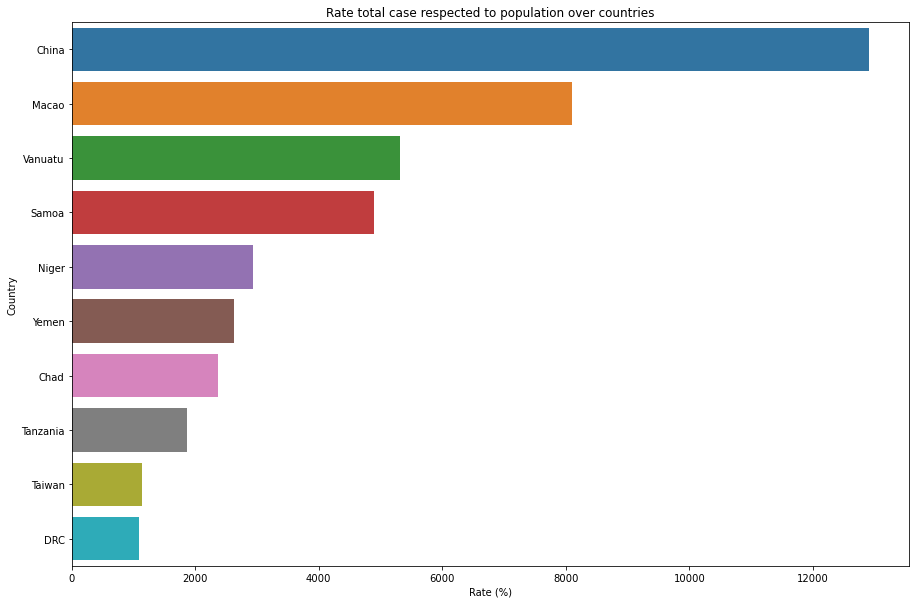

In [ ]:
df_rate_case_pop = df['Population']/df['TotalCases'] 
index = df_rate_case_pop.argsort()[::-1][:10]
top10_rate_case_pop = df.iloc[index]
top10_rate_case_pop['Rate'] = df_rate_case_pop[index]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_rate_case_pop,y='Country,Other',x='Rate')
plt.xlabel("Rate (%)")
plt.ylabel("Country")
plt.title("Rate total case respected to population over countries")
plt.savefig("img/fig2.png")
plt.show()

# Create dataframe by groupping by continent

In [ ]:
df_continent = df.groupby("Continent").sum()
df_continent = df_continent.reset_index()
df_continent.head()

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,Africa,11595864.0,13993.0,251234.0,100.0,10704923.0,23167.0,542578.0,1650.0,1694183.0,17257.0,9.695474e+07,9643349.0,1.393698e+09
1,Asia,122194867.0,616827.0,1363714.0,1796.0,110850182.0,406900.0,9980971.0,30372.0,4362282.0,29306.0,1.956433e+09,76705181.0,4.666393e+09
2,Australia/Oceania,3943533.0,67914.0,8094.0,19.0,3428734.0,59556.0,438373.0,159.0,1015350.0,5771.0,7.191280e+07,9234515.0,4.322481e+07
3,Europe,161566552.0,778403.0,1729671.0,2993.0,137740281.0,1002120.0,17324000.0,13118.0,13258197.0,106970.0,2.511453e+09,185419985.0,7.483897e+08
4,North America,95460608.0,56511.0,1419221.0,1478.0,67910787.0,226780.0,26120797.0,11355.0,5904699.0,49293.0,1.074501e+09,81621388.0,5.968704e+08


# Total cases over continent (Done)

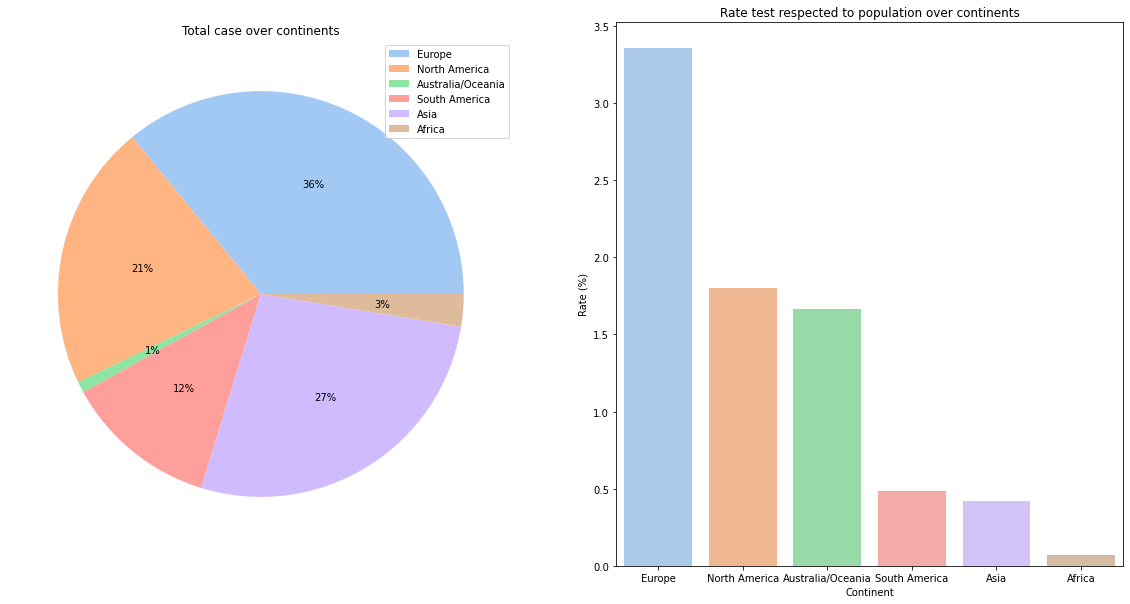

In [ ]:
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1,2,figsize=(20,10))

rate_test_pop_continent = df_continent['TotalTests']/df_continent['Population']
index = rate_test_pop_continent.values.argsort()[::-1]
df_rate_test_pop_continent = df_continent.iloc[index]
df_rate_test_pop_continent['Test/pop'] = rate_test_pop_continent[index]

ax[0].pie(x=df_rate_test_pop_continent['TotalCases'],labels=df_rate_test_pop_continent['Continent'],autopct='%.0f%%',colors=colors,labeldistance=None)
ax[0].set_title("Total case over continents")
ax[0].legend()

sns.barplot(ax=ax[1],y=df_rate_test_pop_continent['Test/pop'],x=df_rate_test_pop_continent['Continent'],palette=colors)
ax[1].set_title("Rate test respected to population over continents")
ax[1].set_xlabel("Continent")
ax[1].set_ylabel("Rate (%)")

plt.savefig('img/fig3.png')
plt.show()

# Pairplot (Nothing)

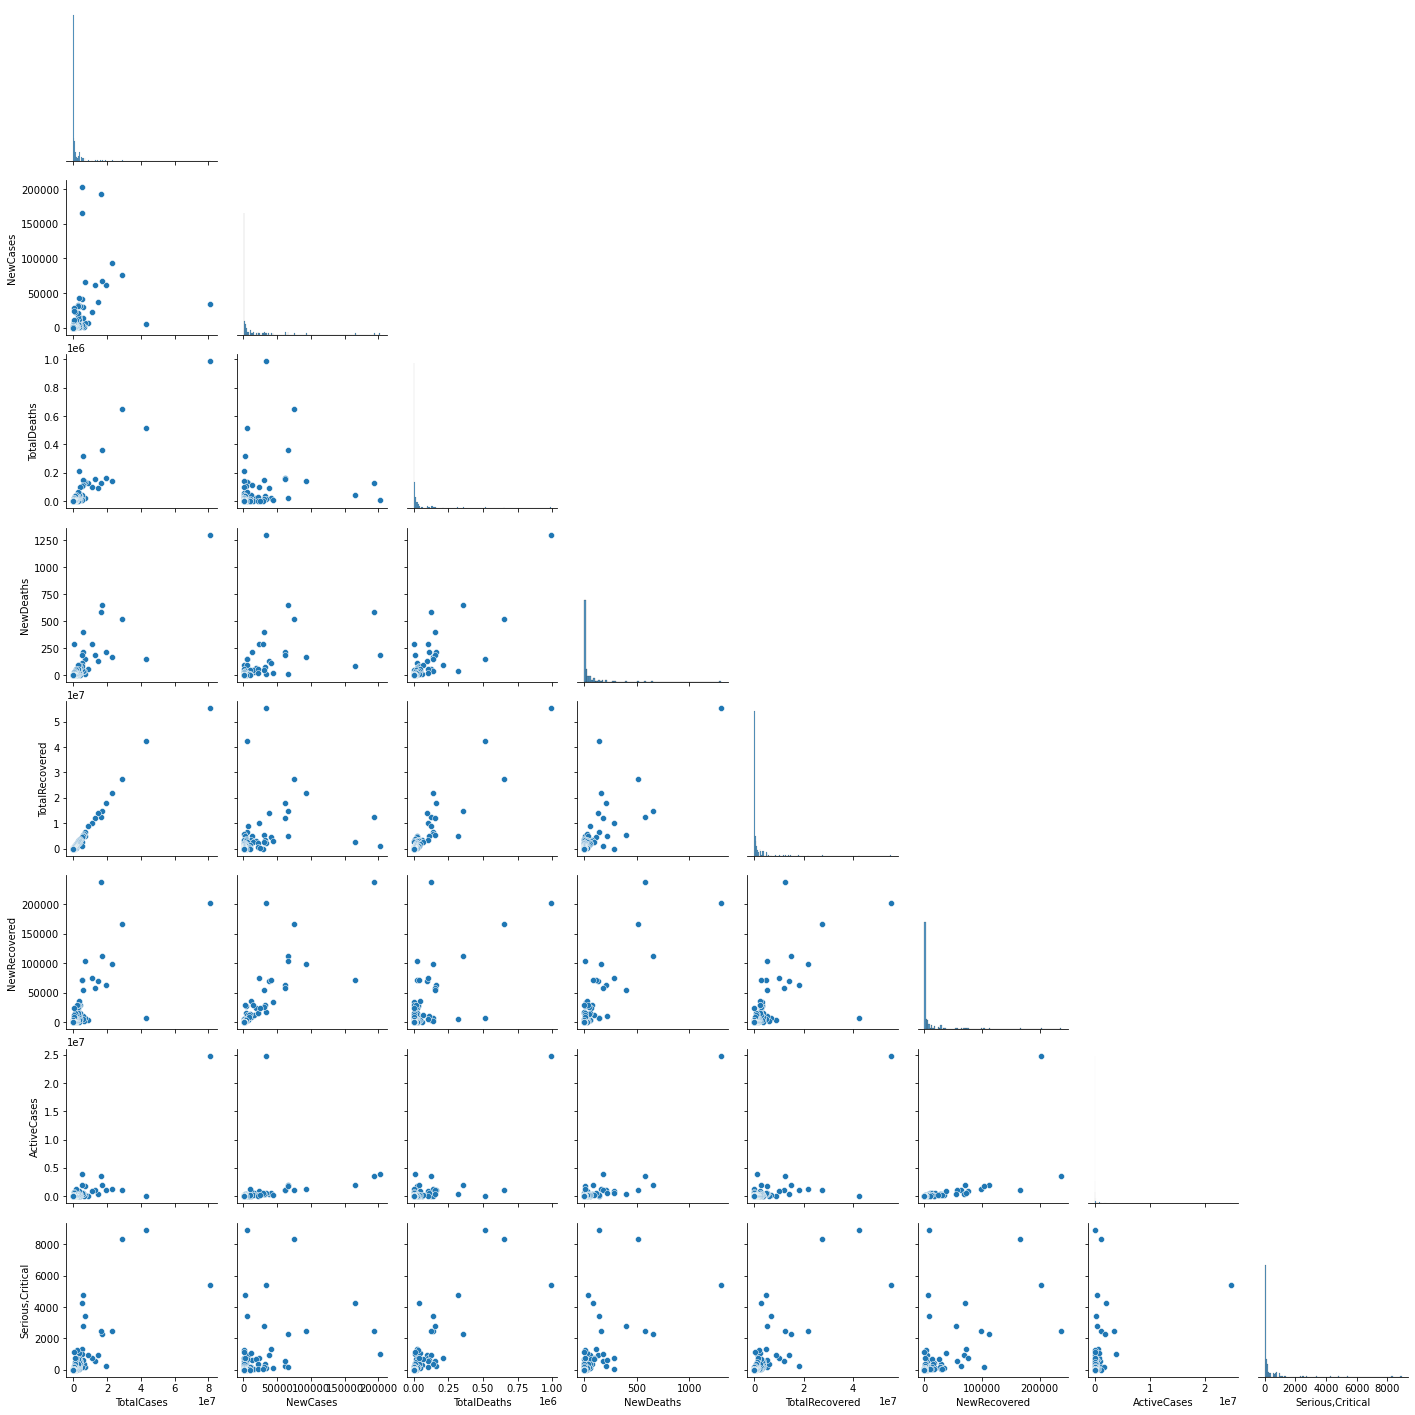

In [ ]:
sns.pairplot(data=df,vars=['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious,Critical'],corner=True)
plt.show()

# Pearson's correlation (Nothing)

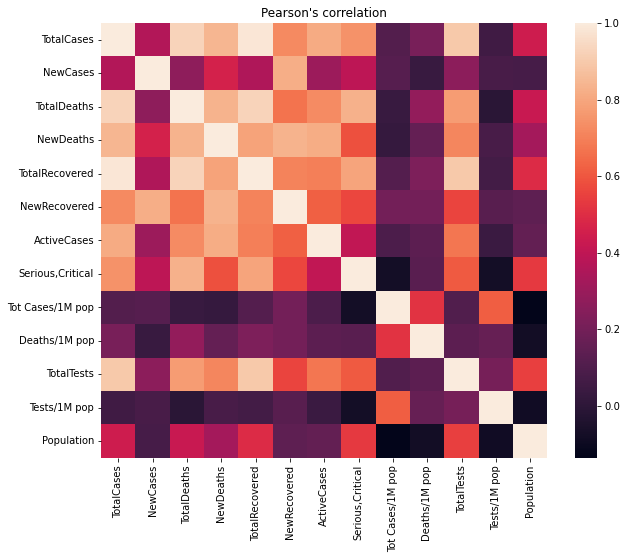

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
plt.title("Pearson's correlation")
sns.heatmap(corr)
plt.show()

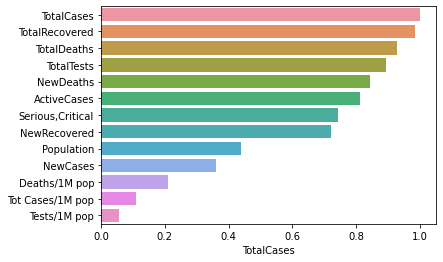

In [ ]:
corr_total_cases = corr['TotalCases']
corr_total_cases = corr_total_cases.sort_values()[::-1]
sns.barplot(y=corr_total_cases.index,x=corr_total_cases)
plt.show()

# Dead and recovery rate

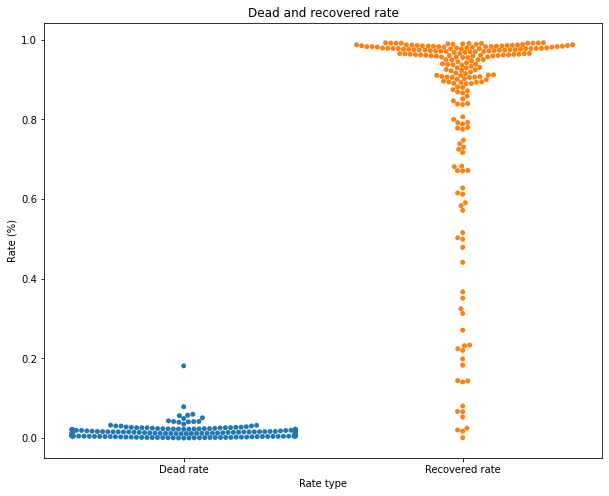

In [ ]:
df_rate = pd.DataFrame(df['Country,Other'])
df_rate['Dead rate'] = df['TotalDeaths'] / df['TotalCases'] 
df_rate['Recovered rate'] = df['TotalRecovered'] / df['TotalCases'] 

plt.figure(figsize=(10,8))
df_rate = df_rate.melt('Country,Other',var_name='Rate type', value_name='Rate (%)')
sns.swarmplot(data=df_rate,y='Rate (%)',x='Rate type')
plt.title("Dead and recovered rate")
plt.savefig('img/fig4.png')
plt.show()

In [ ]:
df['TotalCases_Std'] = z_score(df['TotalCases'])
df['TotalDeaths_Std'] = z_score(df['TotalDeaths'])
df['TotalRecovered_Std'] = z_score(df['TotalRecovered'])

result = smf.ols('TotalCases_Std ~ TotalRecovered_Std + TotalDeaths_Std',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalCases_Std   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3492.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          2.96e-156
Time:                        14:15:03   Log-Likelihood:                 69.273
No. Observations:                 203   AIC:                            -132.5
Df Residuals:                     200   BIC:                            -122.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0091      0.012      0.751      0.453      -0.015       0.033
TotalRecovered_Std     0.8582      0.032     26.437      0.000       0.794       0.922
TotalDeaths_Std        0.1593      0.032      4.906      0.000       0.095       0.223
==============================================================================
Omnibus:                      181.214   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23870.117
Skew:                           2.545   Prob(JB):                         0.00
Kurtosis:                      55.879   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Total test less than total cases

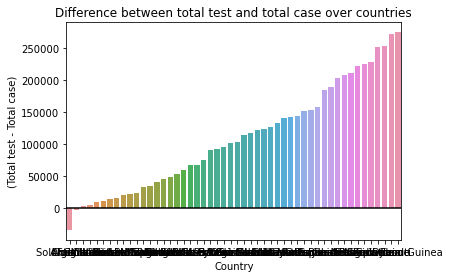

In [ ]:
df_delta_test_total = df
df_delta_test_total['Delta'] = df['TotalTests']-df['TotalCases']
df_delta_test_total = df_delta_test_total.sort_values(by='Delta',ascending=True)[:50]
ax = sns.barplot(data=df_delta_test_total,x='Country,Other',y='Delta')
ax.axhline(0,color='black')

plt.xlabel("Country")
plt.ylabel("(Total test - Total case)")
plt.title("Difference between total test and total case over countries")
plt.savefig("img/fig7.png")
plt.show()

# Relationship log-log of death and serious

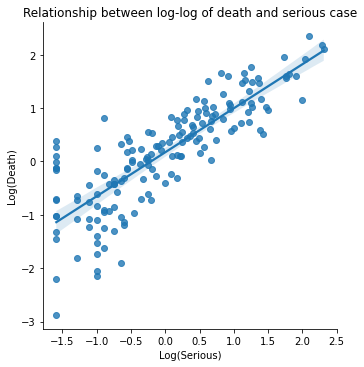

In [ ]:
df['Serious_Log_Std'] = z_score(np.log(df['Serious,Critical']))
df['TotalDeaths_Log_Std'] = z_score(np.log(df['TotalDeaths']))

sns.lmplot(data=df,x='Serious_Log_Std',y='TotalDeaths_Log_Std')
plt.xlabel("Log(Serious)")
plt.ylabel("Log(Death)")
plt.title("Relationship between log-log of death and serious case")
plt.savefig("img/fig8.png")
plt.show()

In [ ]:
result = smf.ols(' Q("TotalDeaths_Log_Std") ~ Q("Serious_Log_Std")',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("TotalDeaths_Log_Std")   R-squared:                       0.689
Model:                                  OLS   Adj. R-squared:                  0.687
Method:                       Least Squares   F-statistic:                     355.1
Date:                      Thu, 17 Mar 2022   Prob (F-statistic):           1.79e-42
Time:                              14:15:05   Log-Likelihood:                -133.52
No. Observations:                       162   AIC:                             271.0
Df Residuals:                           160   BIC:                             277.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1716      0.044      3.934      0.000       0.085       0.258
Q("Serious_Log_Std")     0.8245      0.044     18.845      0.000       0.738       0.911
==============================================================================
Omnibus:                        5.311   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.122
Skew:                          -0.225   Prob(JB):                       0.0468
Kurtosis:                       3.840   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_asian = df[df['Continent'] == 'Asia'].copy()
df_euro = df[df['Continent'] == 'Europe'].copy()
pop_asian = df_asian['Population'] / np.max(df_asian['Population']) * 3000
pop_euro = df_euro['Population'] / np.max(df_euro['Population']) * 3000



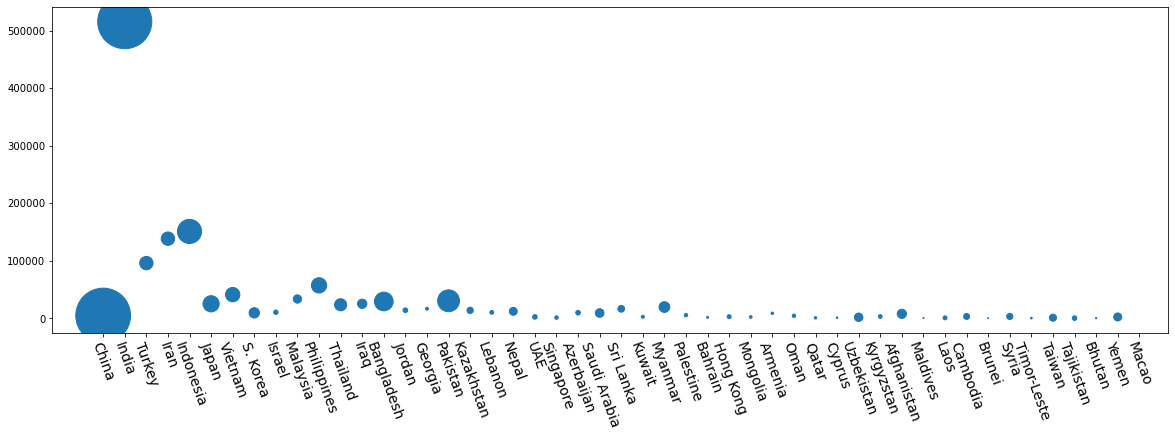

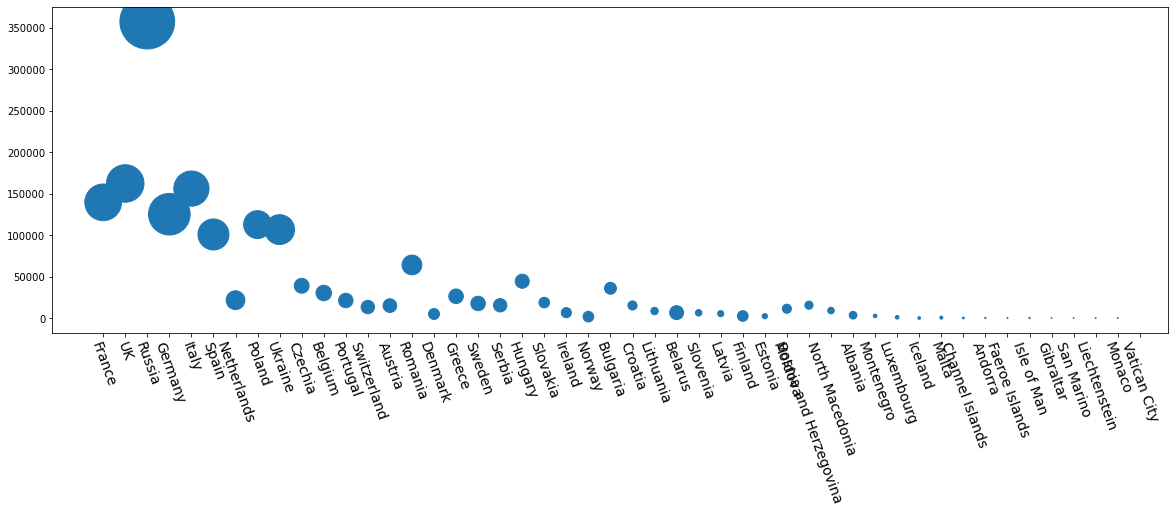

In [ ]:

plt.figure(figsize=(20,6))
plt.xticks(fontsize=14, rotation=-70)
plt.scatter(df_asian['Country,Other'], df_asian['TotalDeaths'], s=pop_asian)
plt.show()

plt.figure(figsize=(20,6))
plt.xticks(fontsize=14, rotation=-70)
plt.scatter(df_euro['Country,Other'], df_euro['TotalDeaths'], s=pop_euro)
plt.show()

In [ ]:
df_asian = df_asian[['Country,Other','TotalDeaths', 'Population']]
df_asian = df_asian.dropna()
df_asian.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 185
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country,Other  48 non-null     object 
 1   TotalDeaths    48 non-null     float64
 2   Population     48 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


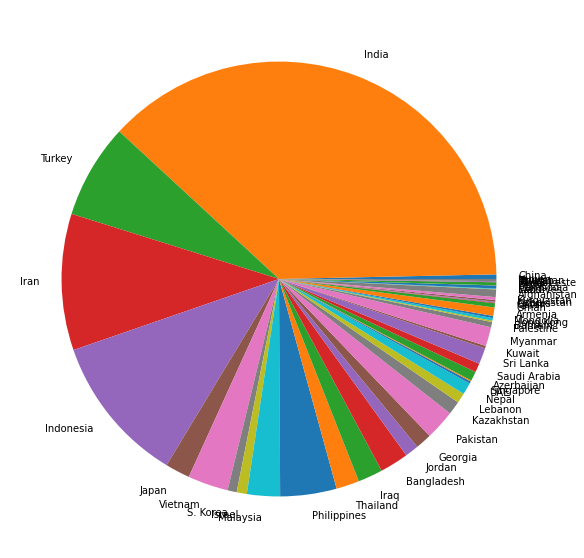

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_asian['TotalDeaths'], labels=df_asian['Country,Other'])
plt.show()